In [49]:
!pip install mplsoccer


In [50]:
import matplotlib.pyplot as plt 
import pandas as pd 
import  numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch 


In [51]:
parser = Sbopen()

In [52]:
df, related , freeze , tactics = parser.event(3795506)

In [53]:
passes = df.loc[df["type_name"]=="pass"].loc[df["sub_type_name"]!= "Trown-in"].set_index("id")

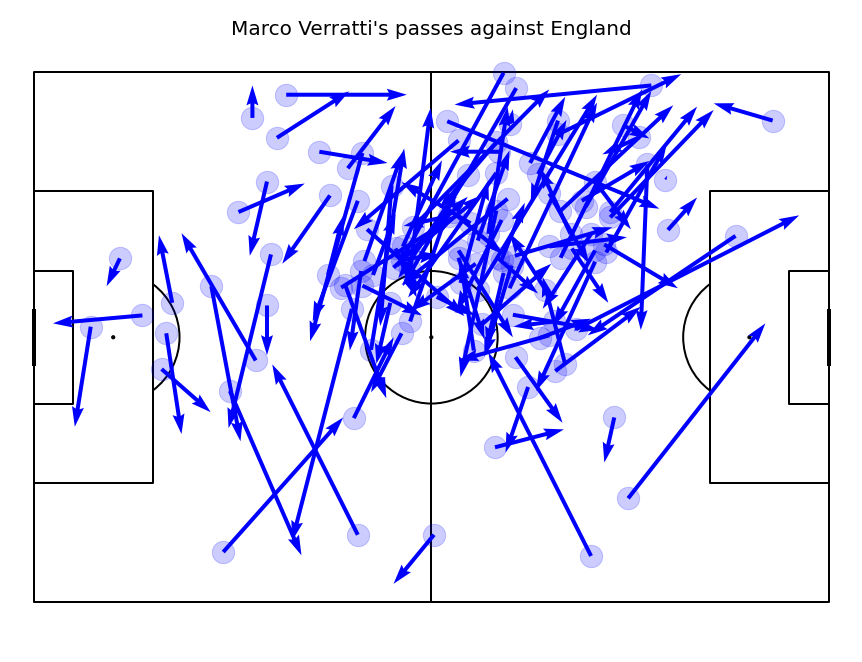

In [54]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Marco Verratti")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Marco Verratti's passes against England", fontsize = 20)
plt.show()

In [55]:
df['player_name'].tail(30)


4766              Jack Grealish
4767                Bukayo Saka
4768                Bukayo Saka
4769                Bukayo Saka
4770                        NaN
4771                        NaN
4772                        NaN
4773                        NaN
4774           Domenico Berardi
4775            Jordan Pickford
4776                 Harry Kane
4777       Gianluigi Donnarumma
4778             Andrea Belotti
4779            Jordan Pickford
4780              Harry Maguire
4781       Gianluigi Donnarumma
4782           Leonardo Bonucci
4783            Jordan Pickford
4784            Marcus Rashford
4785       Gianluigi Donnarumma
4786      Federico Bernardeschi
4787            Jordan Pickford
4788               Jadon Sancho
4789       Gianluigi Donnarumma
4790    Jorge Luiz Frello Filho
4791            Jordan Pickford
4792                Bukayo Saka
4793       Gianluigi Donnarumma
4794                        NaN
4795                        NaN
Name: player_name, dtype: object

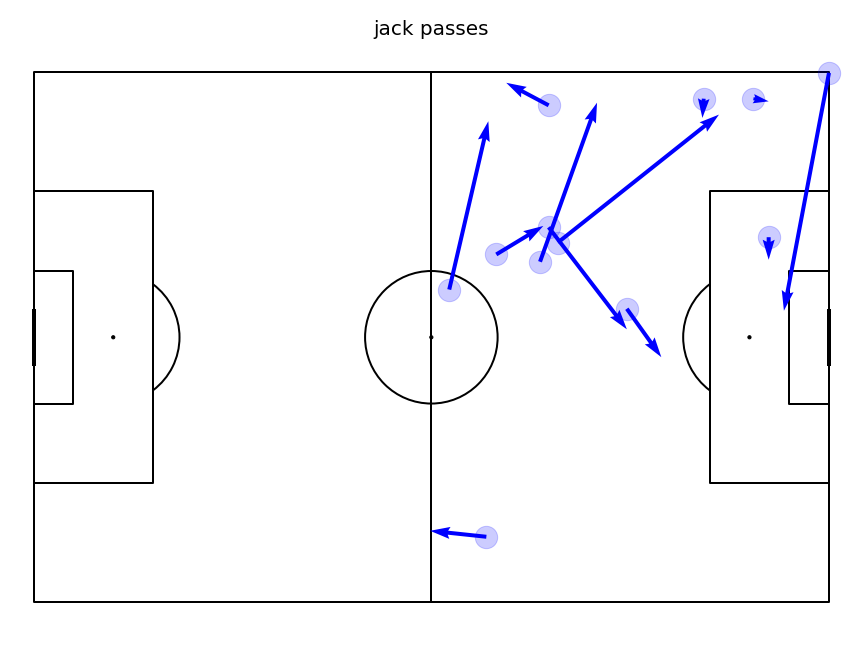

In [56]:
jack = (df.type_name == "Pass" ) & (df.player_name == "Federico Bernardeschi")
df_passs = df.loc[jack , ["x", "y", "end_x", "end_y"]]

pitch = Pitch(line_color="black") 
fig , ax = pitch.grid(grid_height=0.9, title_height=0.06 , axis=False, endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_passs.x, df_passs.y, df_passs.end_x, df_passs.end_y, color ='blue', ax=ax["pitch"])
pitch.scatter(df_passs.x, df_passs.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("jack passes" , fontsize= 20)
plt.show()

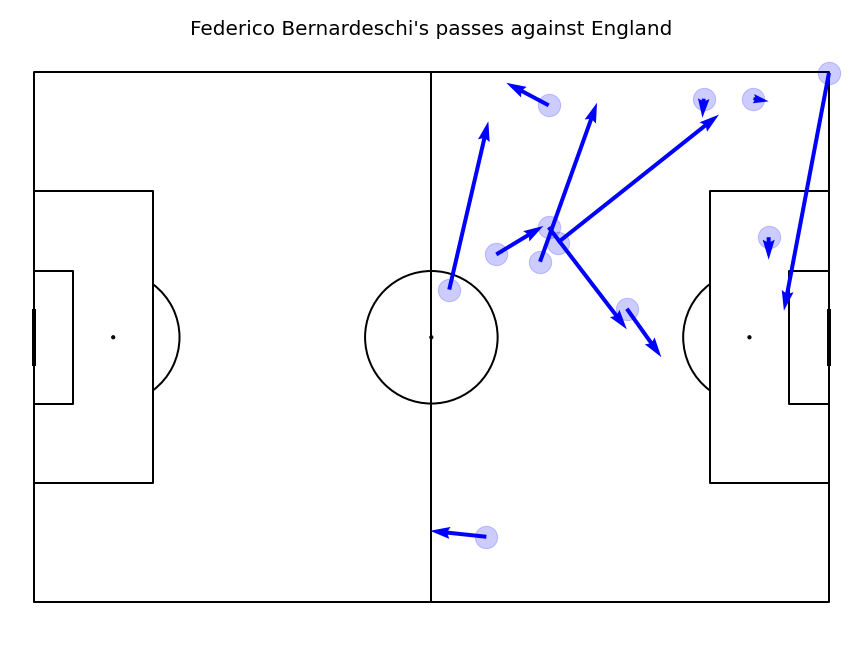

In [57]:
mask_bronze = (df.type_name == 'Pass') & (df.player_name == "Federico Bernardeschi")
df_pass = df.loc[mask_bronze, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass.x, df_pass.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Federico Bernardeschi's passes against England", fontsize = 20)
plt.show()

#####################



In [58]:
df_pass.describe

<bound method NDFrame.describe of           x     y  end_x  end_y
3428   68.3  70.1   59.8   69.2
3685   69.8  27.5   76.9   23.2
3765  101.1   4.0  100.9    6.9
3769  108.6   4.0  110.9    4.4
3938   77.7  23.4   89.5   38.8
4102   77.7   5.0   71.3    1.6
4141   79.1  25.7  103.4    6.4
4194   89.5  35.7   94.7   43.0
4275   76.4  28.6   85.0    4.6
4545   62.7  32.8   68.6    7.4
4581  110.9  24.9  110.9   28.3
4666  120.0   0.1  113.2   36.0>

In [59]:
df_passs

,x,y,end_x,end_y
3428,68.3,70.1,59.8,69.2
3685,69.8,27.5,76.9,23.2
3765,101.1,4.0,100.9,6.9
3769,108.6,4.0,110.9,4.4
3938,77.7,23.4,89.5,38.8
4102,77.7,5.0,71.3,1.6
4141,79.1,25.7,103.4,6.4
4194,89.5,35.7,94.7,43.0
4275,76.4,28.6,85.0,4.6
4545,62.7,32.8,68.6,7.4


In [60]:
df['player_name']

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4              Ciro Immobile
                ...         
4791         Jordan Pickford
4792             Bukayo Saka
4793    Gianluigi Donnarumma
4794                     NaN
4795                     NaN
Name: player_name, Length: 4796, dtype: object

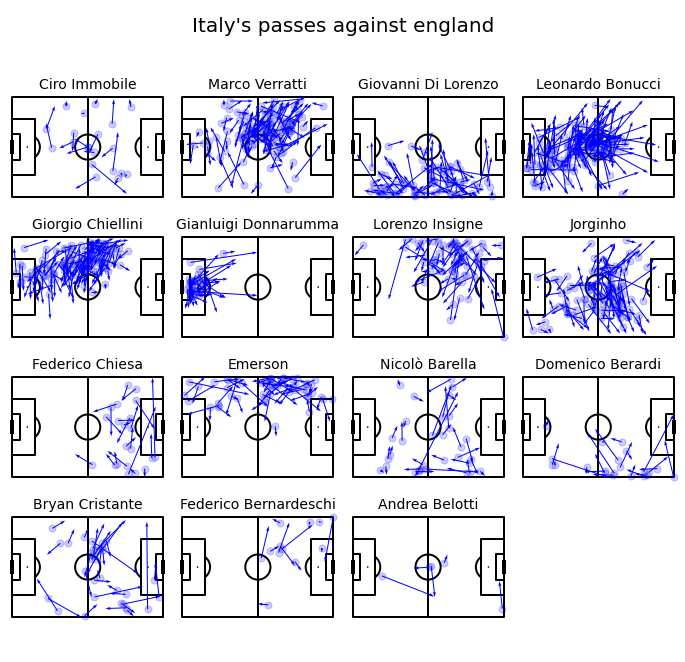

In [89]:
df["player_name"] = df["player_name"].apply(lambda x : x.replace("Jorge Luiz Frello Filho", 'Jorginho') if x == 'Jorge Luiz Frello Filho' else x)
df["player_name"] = df["player_name"].apply(lambda x : x.replace("Emerson Palmieri dos Santos", 'Emerson') if x == 'Emerson Palmieri dos Santos' else x)

mask_italy = (df.type_name == "Pass") & (df.team_name == "Italy") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_italy, ['x','y','end_x', "end_y",'player_name']]

names = df_passes["player_name"].unique()

pitch = Pitch(line_color='black', pad_top=20)

fig , axs = pitch.grid(ncols = 4, nrows = 4 , grid_height = 0.85 , title_height =0.06 ,
                      axis = False , endnote_height = 0.04 , title_space = 0.04 , endnote_space=0.01)

for name , ax in zip(names, axs['pitch'].flat[:len(names)]):
    ax.text(60,-10, name, ha="center", va="center", fontsize=14)
    player_df = df_passes.loc[df_passes["player_name"] == name ]
    
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50 , color = "blue", ax=ax)
    pitch.arrows(player_df.x, player_df.y , player_df.end_x , player_df.end_y, color ="blue", ax=ax , width=1)


for ax in axs["pitch"][-1, 16 - len(names):]:
    ax.remove()
    
axs["title"].text(0.5, 0.5 , "Italy's passes against england", ha ='center', va="center" , fontsize=20)

plt.show()




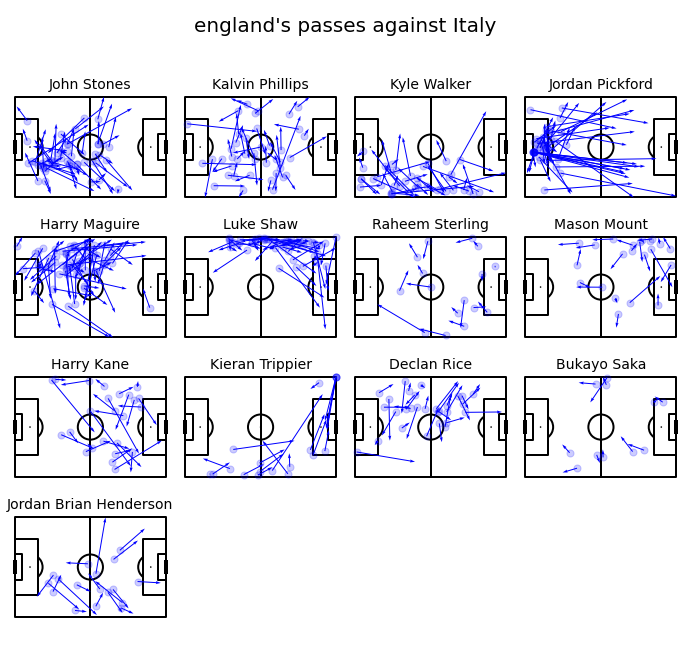

In [91]:
#prepare the dataframe of passes by England that were no-throw ins
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Jorge Luiz Frello Filho', 'Jorginho') if x == 'Jorge Luiz Frello Filho' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Emerson Palmieri dos Santos', 'Emerson') if x == 'Emerson Palmieri dos Santos' else x)
mask_italy = (df.type_name == 'Pass') & (df.team_name == "England") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_italy, ['x', 'y', 'end_x', 'end_y', 'player_name']]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "england's passes against Italy", ha='center', va='center', fontsize=20)
plt.show()